In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

%matplotlib inline

### Reading The data

In [2]:
data = pd.read_csv('train.csv')
data.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.5
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.4


####  To predict - Dataset

### Cleaning The Data

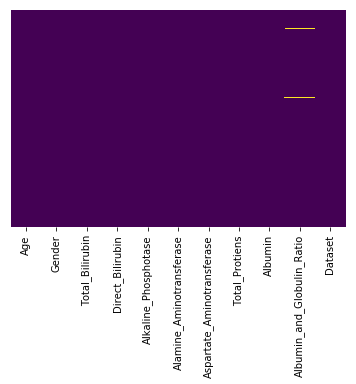

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data["Albumin_and_Globulin_Ratio"].fillna(data["Albumin_and_Globulin_Ratio"].mean(),inplace=True)

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

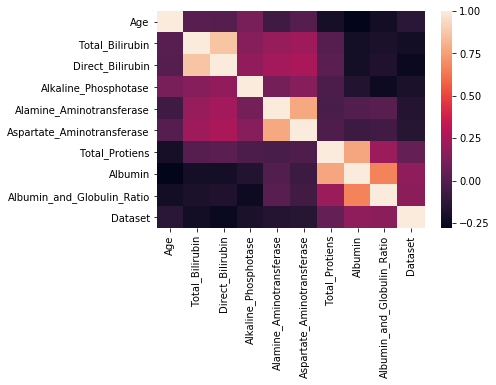

In [7]:
sns.heatmap(data.corr())

In [8]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [9]:
data.drop('Direct_Bilirubin', axis=1, inplace=True)

In [10]:
data.corr()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.017007,0.112266,-0.066935,0.005839,-0.202705,-0.281515,-0.220908,-0.136606
Total_Bilirubin,0.017007,1.000000,0.153458,0.202096,0.227747,0.006593,-0.211662,-0.188044,-0.216970
Alkaline_Phosphotase,0.112266,0.153458,1.000000,0.100744,0.151079,-0.023904,-0.165888,-0.239021,-0.187186
Alamine_Aminotransferase,-0.066935,0.202096,0.100744,1.000000,0.784251,-0.033468,-0.010968,0.015316,-0.156944
Aspartate_Aminotransferase,0.005839,0.227747,0.151079,0.784251,1.000000,-0.016300,-0.075667,-0.059740,-0.148021
Total_Protiens,-0.202705,0.006593,-0.023904,-0.033468,-0.016300,1.000000,0.773420,0.214273,0.048957
Albumin,-0.281515,-0.211662,-0.165888,-0.010968,-0.075667,0.773420,1.000000,0.669463,0.182147
Albumin_and_Globulin_Ratio,-0.220908,-0.188044,-0.239021,0.015316,-0.059740,0.214273,0.669463,1.000000,0.171473
Dataset,-0.136606,-0.216970,-0.187186,-0.156944,-0.148021,0.048957,0.182147,0.171473,1.000000


### Dividing the dataaset into X and Y

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
X.head(3)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,60,Male,6.3,314,118,114,6.6,3.7,1.27
1,31,Female,0.8,158,21,16,6.0,3.0,1.00
2,60,Male,19.6,466,46,52,6.1,2.0,0.40


In [13]:
y.head(3)

0    1
1    1
2    1
Name: Dataset, dtype: int64

### Encoding Categorical Data

In [14]:
gender = pd.get_dummies(X['Gender'], prefix='Gender')
gender.head(3)

,Gender_Female,Gender_Male
0,0,1
1,1,0
2,0,1


In [15]:
gender.drop('Gender_Female', inplace=True, axis=1)
gender.head(3)

,Gender_Male
0,1
1,0
2,1


In [16]:
X.drop(['Gender'],axis=1,inplace=True)
X = pd.concat([X,gender], axis=1)

In [17]:
X.head(3)

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,60,6.3,314,118,114,6.6,3.7,1.27,1
1,31,0.8,158,21,16,6.0,3.0,1.00,0
2,60,19.6,466,46,52,6.1,2.0,0.40,1


In [18]:
#No change made in original data
data.head(3)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,466,46,52,6.1,2.0,0.40,1


### Splitting Dataset into Training set and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Getting Outliers

Text(0.5,1,'Outlier Box Plot')

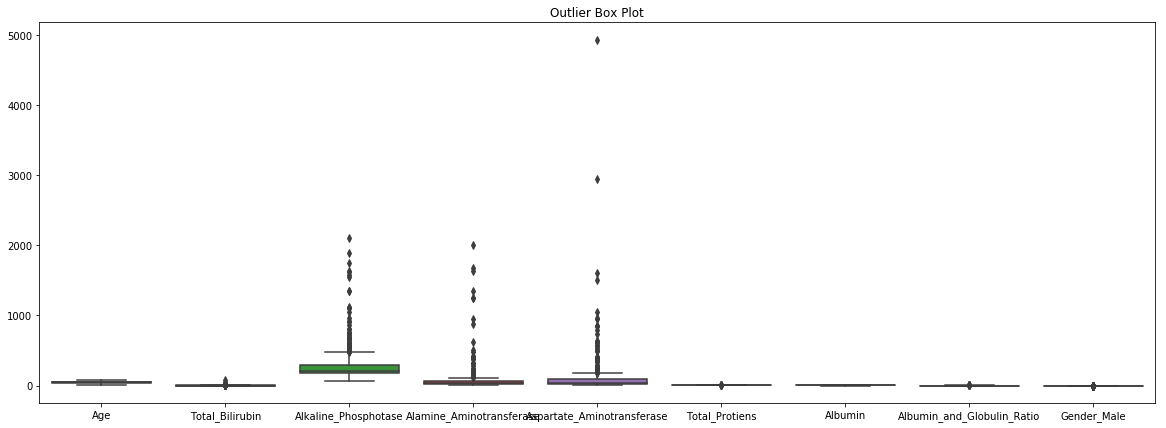

In [20]:
plt.figure(figsize=(20,7))
sns.boxplot(data= X).set_title("Outlier Box Plot")

#### Accuracy Score using Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

accuracy_score(logreg.predict(X),y)

0.7124463519313304

In [22]:
accuracy_score(logreg.predict(X_train),y_train)

0.7020057306590258

In [23]:
accuracy_score(logreg.predict(X_test),y_test)

0.7435897435897436

#### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

classi = DecisionTreeClassifier().fit(X_train, y_train)
accuracy_score(classi.predict(X_train), y_train)

1.0

In [25]:
accuracy_score(classi.predict(X_test),y_test)

0.5897435897435898

#### K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_train), y_train)

0.7851002865329513

In [27]:
accuracy_score(knn.predict(X_test), y_test)

0.6837606837606838

#### Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy_score(gnb.predict(X_train), y_train)

0.5816618911174785

In [29]:
accuracy_score(gnb.predict(X_test), y_test)

0.4700854700854701

#### Support Vector Machine

In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
accuracy_score(svm.predict(X_train), y_train)

0.997134670487106

In [31]:
accuracy_score(svm.predict(X_test), y_test)

0.7777777777777778

##### Conclusion : The SVM gives the best result

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
confusion_matrix(y_test, pred)

array([[90,  0],
       [26,  1]], dtype=int64)

In [33]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.78      1.00      0.87        90
          2       1.00      0.04      0.07        27

avg / total       0.83      0.78      0.69       117



### Processing test dataset

In [34]:
test_data.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.5
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.4


In [35]:
test_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [36]:
#data.drop('Direct_Bilirubin', axis=1, inplace=True)

In [37]:
X_test_data = test_data.copy()

In [38]:
gender = pd.get_dummies(X_test_data['Gender'], prefix='Gender')
gender.head(3)

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0


In [39]:
gender.drop('Gender_Female', inplace=True, axis=1)
gender.head(3)

,Gender_Male
0,1
1,1
2,0


In [40]:
X_test_data.drop(['Gender'],axis=1,inplace=True)
X_test_data = pd.concat([X_test_data,gender], axis=1)

In [41]:
X_test_data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
Gender_Male                   0
dtype: int64

In [42]:
X_test_data["Albumin_and_Globulin_Ratio"].fillna(X_test_data["Albumin_and_Globulin_Ratio"].mean(),inplace=True)

In [43]:
X_test_data = X_test_data.drop('Direct_Bilirubin', axis=1)

### Predicting values for train data set

In [44]:
X_test_data.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [45]:
X_test_data.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [46]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
y_pred_test_data = svm.predict(X_test_data)

In [48]:
y_pred_test_data = pd.DataFrame(y_pred_test_data)

In [49]:
y_pred_test_data[0].unique()

array([1, 2], dtype=int64)

In [51]:
y_pred_test_data.to_csv('prob_1_sol.csv', index=False)